Computed term frequency and inverse document frequency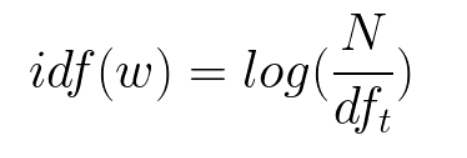

Used preprocessed dataset of hindi training data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
d = pd.read_csv("/content/drive/MyDrive/Project/Pre_HTrain.csv")

In [ ]:
d = d.drop( ['experience'], axis =1)

Changi object datatype to string for furthur usage

In [ ]:
print(d['review'].dtype)

object


In [ ]:
d['review'] = d['review'].astype("string")

In [ ]:
print(d['review'].dtype)

string


Creating a list of Bag of Words to store words from each row in dataset

In [ ]:
bow = list()
for i in range(0, len(d)):
  bow.append( d['review'][i].split(' '))

Creating unique word set from all bag of words

In [ ]:
uws = set()
for i in range(1, len(d)):
  uws = set(bow[i]).union(set(bow[i-1]))

In [ ]:
uws

Adding left out words ( I donn't know why but even after many trials there are some words that dont get included in respective bow ).

In [ ]:
for i in range(0, len(d)):
  for word in bow[i]:
    if word not in uws:
      uws.add(word)

Now counting number of occurence of words

In [ ]:
# For first row trial
"""da = dict.fromkeys(uws, 0)
for word in bow[0]:
  da[word] += 1
print(da)
"""

{'': 20, 'डायरेक्ट': 1, 'इंस्पेक्टर': 0, 'अंकल': 0, 'रियलिस्टिक': 0, 'परिस्थितिवश': 0, 'हईश': 0, 'आट': 0, 'हँसतेहँस': 0, 'ा': 0, 'बेमज': 0, 'सीखें।': 0, 'नारद': 0, 'आर्टरटन': 0, 'सशक्तिरकण': 0, 'डब': 0, 'सौतेल': 0, 'चीप': 0, 'मुल': 0, 'बैन': 0, 'वेडनेस': 0, 'टिवस्ट्': 0, 'नकचढ़': 0, 'घायल': 0, 'स्वभाव': 0, 'उमर': 0, 'बागडोर': 0, 'हलाल': 0, 'फेडरेशन': 0, 'बैंडेज': 0, 'लाएंगे।': 0, 'इर्दगिर्द': 1, 'सालभर': 0, 'लज़ीज': 0, 'पंचानाम': 0, 'क्रिस्टन': 0, 'असुरक्ष': 0, 'wanted': 0, 'कभीकभ': 0, 'हंट': 0, 'पंचिंग': 0, 'रजनीकांत': 0, 'संख्\u200d': 0, 'मुकाबल': 0, 'पार्टनर': 0, 'मा\u200dसूम': 0, 'कोफ्त': 0, 'now': 0, 'बैठ': 1, 'इंफोटेनमेंट': 0, 'हुआ।हाल': 0, 'क्षतविक्षत': 0, 'सर्जिकल': 0, 'चिकन': 0, 'शेड्स': 0, 'सिंडीकेट': 0, 'काफिल': 0, 'झांस': 0, 'जीएम': 0, 'मातिन': 0, 'स्त': 0, '2020': 0, 'गुदगुदाए।': 0, 'प्वाइंट': 0, 'पाउल': 0, 'केटेल': 0, 'अजूब': 0, 'एक्सरसाइज': 0, 'जूझ': 0, 'कर्म': 0, 'तरीक': 0, 'मुलाकात': 0, 'डिग्रीग्रेड्स': 0, 'निश्च': 0, '28': 0, 'मिनिष': 0, 'चर्ब': 0, 'शैलेश': 0, 'प्रस्त

Creating a ist named 'dicti' to store frequency of each word in each rows.
Initialised with all word count to 0

In [ ]:
dicti = list()
for i in range(0, len(d)):
  dicti.append(dict.fromkeys(uws, 0)) # Initializing with all word count to 0

for i in range(0, len(d)):
  for word in bow[i]:
    dicti[i][word] += 1

In [ ]:
#dicti[57]

Tf

Term frequency in any document vector is denoted by the raw frequency value of that term in a particular document. Mathematically it can be represented as follows:

tf(w,D)=fwD

where  fwD
  denoted frequency for word w in document D, which becomes the term frequency (tf ). Sometimes you can also normalize the absolute raw frequency using logarithms or averaging the frequency. We use the raw frequency in our computations.

So, in other words, The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

In [ ]:
# Term frequency

def compute_term_frequency(word_dictionary, bag_of_words):
    term_frequency_dictionary = {}
    length_of_bag_of_words = len(bag_of_words)

    for word, count in word_dictionary.items():
        term_frequency_dictionary[word] = count / float(length_of_bag_of_words)

    return term_frequency_dictionary

In [ ]:
print(compute_term_frequency(da, bow[0]))

{'': 0.05012531328320802, 'डायरेक्ट': 0.002506265664160401, 'इंस्पेक्टर': 0.0, 'अंकल': 0.0, 'रियलिस्टिक': 0.0, 'परिस्थितिवश': 0.0, 'हईश': 0.0, 'आट': 0.0, 'हँसतेहँस': 0.0, 'ा': 0.0, 'बेमज': 0.0, 'सीखें।': 0.0, 'नारद': 0.0, 'आर्टरटन': 0.0, 'सशक्तिरकण': 0.0, 'डब': 0.0, 'सौतेल': 0.0, 'चीप': 0.0, 'मुल': 0.0, 'बैन': 0.0, 'वेडनेस': 0.0, 'टिवस्ट्': 0.0, 'नकचढ़': 0.0, 'घायल': 0.0, 'स्वभाव': 0.0, 'उमर': 0.0, 'बागडोर': 0.0, 'हलाल': 0.0, 'फेडरेशन': 0.0, 'बैंडेज': 0.0, 'लाएंगे।': 0.0, 'इर्दगिर्द': 0.002506265664160401, 'सालभर': 0.0, 'लज़ीज': 0.0, 'पंचानाम': 0.0, 'क्रिस्टन': 0.0, 'असुरक्ष': 0.0, 'wanted': 0.0, 'कभीकभ': 0.0, 'हंट': 0.0, 'पंचिंग': 0.0, 'रजनीकांत': 0.0, 'संख्\u200d': 0.0, 'मुकाबल': 0.0, 'पार्टनर': 0.0, 'मा\u200dसूम': 0.0, 'कोफ्त': 0.0, 'now': 0.0, 'बैठ': 0.002506265664160401, 'इंफोटेनमेंट': 0.0, 'हुआ।हाल': 0.0, 'क्षतविक्षत': 0.0, 'सर्जिकल': 0.0, 'चिकन': 0.0, 'शेड्स': 0.0, 'सिंडीकेट': 0.0, 'काफिल': 0.0, 'झांस': 0.0, 'जीएम': 0.0, 'मातिन': 0.0, 'स्त': 0.0, '2020': 0.0, 'गुदगुदाए।': 0.0, '

In [ ]:
# Computiing tf for first 5 rows
# Unable to print all due to data limits of colab notebook
for i in range(0, 5):
  print(compute_term_frequency(dicti[i], bow[i]))

{'': 0.05012531328320802, 'डायरेक्ट': 0.002506265664160401, 'इंस्पेक्टर': 0.0, 'अंकल': 0.0, 'रियलिस्टिक': 0.0, 'परिस्थितिवश': 0.0, 'हईश': 0.0, 'आट': 0.0, 'हँसतेहँस': 0.0, 'ा': 0.0, 'बेमज': 0.0, 'सीखें।': 0.0, 'नारद': 0.0, 'आर्टरटन': 0.0, 'सशक्तिरकण': 0.0, 'डब': 0.0, 'सौतेल': 0.0, 'चीप': 0.0, 'मुल': 0.0, 'बैन': 0.0, 'वेडनेस': 0.0, 'टिवस्ट्': 0.0, 'नकचढ़': 0.0, 'घायल': 0.0, 'स्वभाव': 0.0, 'उमर': 0.0, 'बागडोर': 0.0, 'हलाल': 0.0, 'फेडरेशन': 0.0, 'बैंडेज': 0.0, 'लाएंगे।': 0.0, 'इर्दगिर्द': 0.002506265664160401, 'सालभर': 0.0, 'लज़ीज': 0.0, 'पंचानाम': 0.0, 'क्रिस्टन': 0.0, 'असुरक्ष': 0.0, 'wanted': 0.0, 'कभीकभ': 0.0, 'हंट': 0.0, 'पंचिंग': 0.0, 'रजनीकांत': 0.0, 'संख्\u200d': 0.0, 'मुकाबल': 0.0, 'पार्टनर': 0.0, 'मा\u200dसूम': 0.0, 'कोफ्त': 0.0, 'now': 0.0, 'बैठ': 0.002506265664160401, 'इंफोटेनमेंट': 0.0, 'हुआ।हाल': 0.0, 'क्षतविक्षत': 0.0, 'सर्जिकल': 0.0, 'चिकन': 0.0, 'शेड्स': 0.0, 'सिंडीकेट': 0.0, 'काफिल': 0.0, 'झांस': 0.0, 'जीएम': 0.0, 'मातिन': 0.0, 'स्त': 0.0, '2020': 0.0, 'गुदगुदाए।': 0.0, '

Inverse Document Frequency

Inverse Document Frequency, measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones
Mathematically, our implementation for idf can be represented as follows :




In [ ]:
import math
# This function takes input all the dictionaries of text for which tf-idf is supposed to calculated
def compute_inverse_document_frequency(full_doc_list):
    idf_dict = {}
    length_of_doc_list = len(full_doc_list)

    idf_dict = dict.fromkeys(full_doc_list[0].keys(), 0)
    for word, value in idf_dict.items():
        idf_dict[word] = math.log(length_of_doc_list / (float(value) + 1))

    return idf_dict

In [ ]:
idf_dict = compute_inverse_document_frequency([da, db])
print(idf_dict)

{'': 0.6931471805599453, 'डायरेक्ट': 0.6931471805599453, 'इंस्पेक्टर': 0.6931471805599453, 'अंकल': 0.6931471805599453, 'रियलिस्टिक': 0.6931471805599453, 'परिस्थितिवश': 0.6931471805599453, 'हईश': 0.6931471805599453, 'आट': 0.6931471805599453, 'हँसतेहँस': 0.6931471805599453, 'ा': 0.6931471805599453, 'बेमज': 0.6931471805599453, 'सीखें।': 0.6931471805599453, 'नारद': 0.6931471805599453, 'आर्टरटन': 0.6931471805599453, 'सशक्तिरकण': 0.6931471805599453, 'डब': 0.6931471805599453, 'सौतेल': 0.6931471805599453, 'चीप': 0.6931471805599453, 'मुल': 0.6931471805599453, 'बैन': 0.6931471805599453, 'वेडनेस': 0.6931471805599453, 'टिवस्ट्': 0.6931471805599453, 'नकचढ़': 0.6931471805599453, 'घायल': 0.6931471805599453, 'स्वभाव': 0.6931471805599453, 'उमर': 0.6931471805599453, 'बागडोर': 0.6931471805599453, 'हलाल': 0.6931471805599453, 'फेडरेशन': 0.6931471805599453, 'बैंडेज': 0.6931471805599453, 'लाएंगे।': 0.6931471805599453, 'इर्दगिर्द': 0.6931471805599453, 'सालभर': 0.6931471805599453, 'लज़ीज': 0.6931471805599453, 

In [ ]:

idf = compute_inverse_document_frequency(dicti)
print(idf)

{'': 6.576469569048224, 'डायरेक्ट': 6.576469569048224, 'इंस्पेक्टर': 6.576469569048224, 'अंकल': 6.576469569048224, 'रियलिस्टिक': 6.576469569048224, 'परिस्थितिवश': 6.576469569048224, 'हईश': 6.576469569048224, 'आट': 6.576469569048224, 'हँसतेहँस': 6.576469569048224, 'ा': 6.576469569048224, 'बेमज': 6.576469569048224, 'सीखें।': 6.576469569048224, 'नारद': 6.576469569048224, 'आर्टरटन': 6.576469569048224, 'सशक्तिरकण': 6.576469569048224, 'डब': 6.576469569048224, 'सौतेल': 6.576469569048224, 'चीप': 6.576469569048224, 'मुल': 6.576469569048224, 'बैन': 6.576469569048224, 'वेडनेस': 6.576469569048224, 'टिवस्ट्': 6.576469569048224, 'नकचढ़': 6.576469569048224, 'घायल': 6.576469569048224, 'स्वभाव': 6.576469569048224, 'उमर': 6.576469569048224, 'बागडोर': 6.576469569048224, 'हलाल': 6.576469569048224, 'फेडरेशन': 6.576469569048224, 'बैंडेज': 6.576469569048224, 'लाएंगे।': 6.576469569048224, 'इर्दगिर्द': 6.576469569048224, 'सालभर': 6.576469569048224, 'लज़ीज': 6.576469569048224, 'पंचानाम': 6.576469569048224, 'क्र